In [1]:
import numpy as np
import os
import csv
import cvxopt

from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
'''
https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8
'''

class SVM:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))
        
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        
        # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        
        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
            
def project(self, X):
    return np.dot(X, self.w) + self.b

def predict(self, X):
    return np.sign(self.project(X))

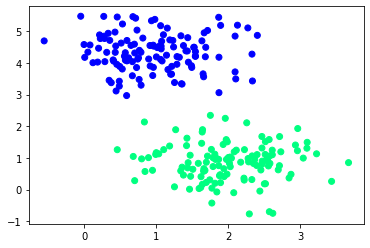

In [3]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  1e-15  7e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-16  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  6e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  5e-15
Optimal solution found.


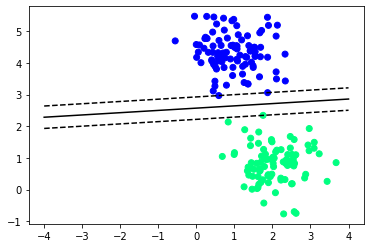

In [5]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [6]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

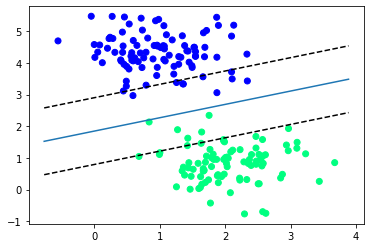

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [8]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]])

In [10]:
dataset_path = 'ECGID_DB_DATASET/'
person_id = '1'
temp_data = []
train_X = []
train_Y = []

with open(dataset_path + person_id + '/rec_1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        temp_data.append(', '.join(row))

    for i in range(0,len(temp_data)):
        temp = temp_data[i].split(',')
        train_X[0].append([temp[0]])
        train_X[1].append(temp[1])

print(train_X)

['-1.150000000000000050e-01', '-1.150000000000000050e-01', '-1.199999999999999956e-01', '-1.199999999999999956e-01', '-1.199999999999999956e-01', '-1.199999999999999956e-01', '-1.199999999999999956e-01', '-1.150000000000000050e-01', '-1.150000000000000050e-01', '-1.150000000000000050e-01', '-1.100000000000000006e-01', '-1.100000000000000006e-01', '-1.100000000000000006e-01', '-1.100000000000000006e-01', '-1.049999999999999961e-01', '-1.049999999999999961e-01', '-1.049999999999999961e-01', '-1.049999999999999961e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-1.000000000000000056e-01', '-9.500000000000000111e-02', '-9.500000000000000111e-02', '-9.500000000000000111e-02', '-9.500000000000000111e-02', '-8.999999999999999667e-02', '-8.999999999999999667e-02', '-8.999999999999999667e-02', '-8.999999999

In [10]:
clf = SVC(gamma='auto')
y_pred = svc.predict()
clf.fit(np.array(train_X).reshape(-1,1), train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
dec = clf.decision_function([[1]])
dec.shape[1]

188

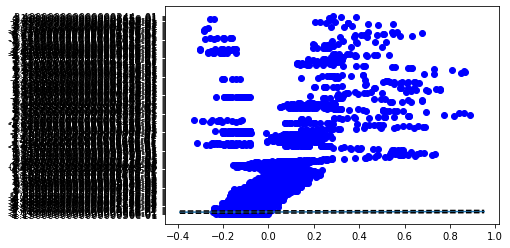

In [14]:
plt.scatter(train_X[:], train_Y[:], c={'BLUE'}, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')